In [6]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the data

df = pd.read_excel("bank_data.xlsx")

# Drop duration
#df.drop('duration', axis=1, inplace=True)
#df.drop('emp.var.rate', axis = 1, inplace= True)

df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'bank_data.xlsx'

In [112]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
categorical = df.select_dtypes(include=['int64', 'float64']).columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in emp.var.rate
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [113]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [114]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [115]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays']

for i in x:
    unknown_count = (df[i] == 'unknown').sum()
    print(f"{i}: {df[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20], Number of 'unknown': 0


In [116]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = df[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (df[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:admin., Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:university.degree, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [117]:
# Dropping records with unknowns in job and marital as they are small in number 

import pandas as pd

# Assuming your DataFrame is named df and the columns with 'unknown' values are 'col1', 'col2', 'col3'
columns_with_unknown = ['job', 'marital']

# Create a boolean mask for rows with 'unknown' values in any of the specified columns
filter = df[columns_with_unknown].apply(lambda col: col != 'unknown').all(axis=1)

# Filter the DataFrame to include only rows where the condition is True
df_filtered = df[filter]


# Assuming df2 is your DataFrame
target_column = 'default'

# Filter out instances with 'yes' as there were only 3 records with default = yes
df_filtered = df_filtered[df_filtered[target_column].isin(['no', 'unknown'])]

# Display the filtered DataFrame
df_filtered 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [118]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df_filtered.copy()
df2['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 
                   'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace= True)
df2['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course',
 'unknown', 'university.degree', 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)
df2['loan'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)
df2['housing'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)

# Binary encoding

df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
df2['default'] = df2['default'].map({'no': 1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 1, 'telephone': 0})


df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,1,1,1,2,2,0,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,0,2,2,0,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,1,1,2,0,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,7,1,3,1,2,2,0,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,1,2,1,0,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,1,1,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,1,1,2,1,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,2,1,5,1,2,2,1,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


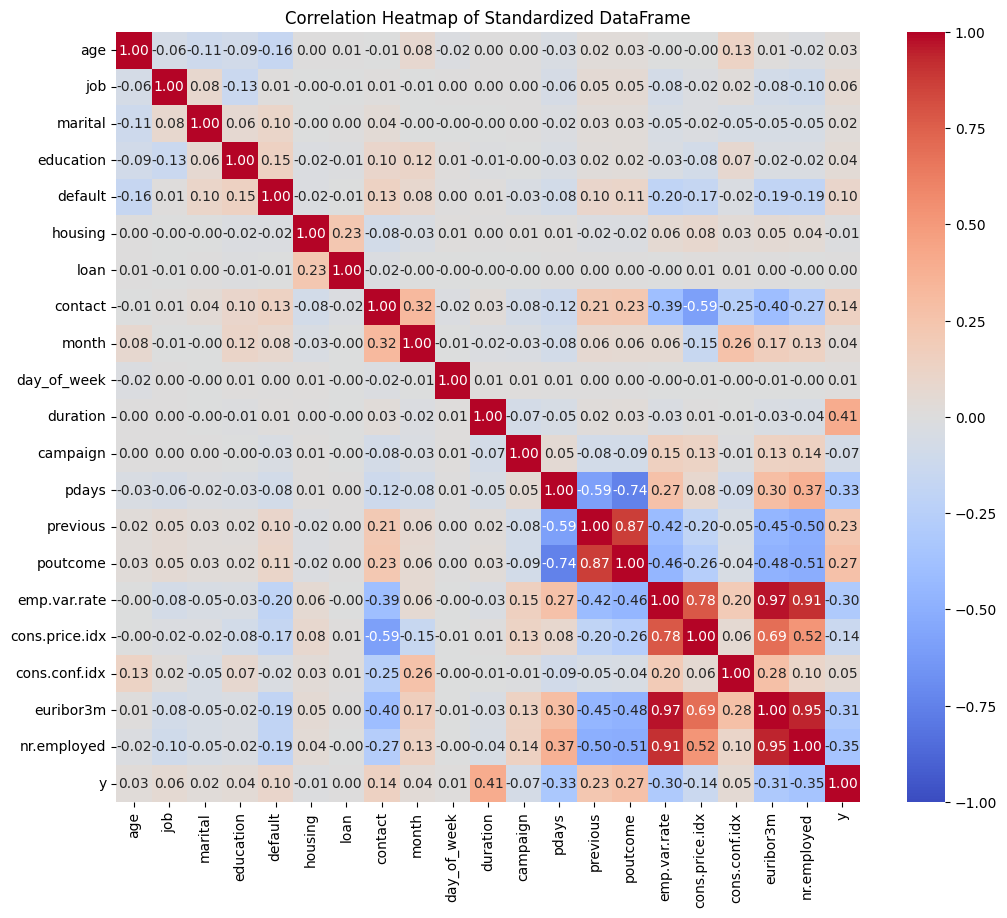

In [119]:
# Correlation analysis

# Q: Should we do Feature selection via correlation analysis?
# Ans: Need to discuss but if we do go ahead with this then
# Check if we need to set a threshold for correlation coeff of say 0.9 and drop columns that have >0.9


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2_standardized is your standardized DataFrame
# You may want to adjust the size of the heatmap based on your needs
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap of Standardized DataFrame')
plt.show()



In [120]:
# Correlation feature selection

import pandas as pd

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Set the correlation threshold
corr_threshold = 0.8

# Create a mask to identify highly correlated features
mask = (corr_matrix.abs() > corr_threshold) & (corr_matrix.abs() < 1.0)

# Identify pairs of highly correlated features
correlated_features = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        correlated_features.add(col)
        correlated_features.update(correlated_cols)

# Remove one feature from each correlated pair
features_to_drop = list(correlated_features)
df_dropped = df2.drop(columns=features_to_drop)

# Display the filtered DataFrame
print("Original DataFrame shape:", df2.shape)
print("Filtered DataFrame shape:", df_dropped.shape)


Original DataFrame shape: (40784, 21)
Filtered DataFrame shape: (40784, 16)


In [2]:
df_dropped

NameError: name 'df_dropped' is not defined

Number of samples before SMOTE: 32627
Number of samples after SMOTE: 57904


100%|██████████| 1000/1000 [00:02<00:00, 404.65it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


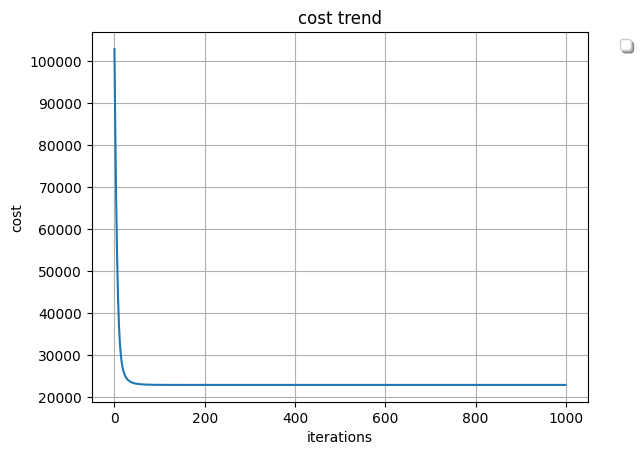

Precision: 38.95 %
Recall: 72.47 %
Accuracy: 84.1 %
F1: 50.67%
Confusion Matrix:
[[6194 1044]
 [ 253  666]]


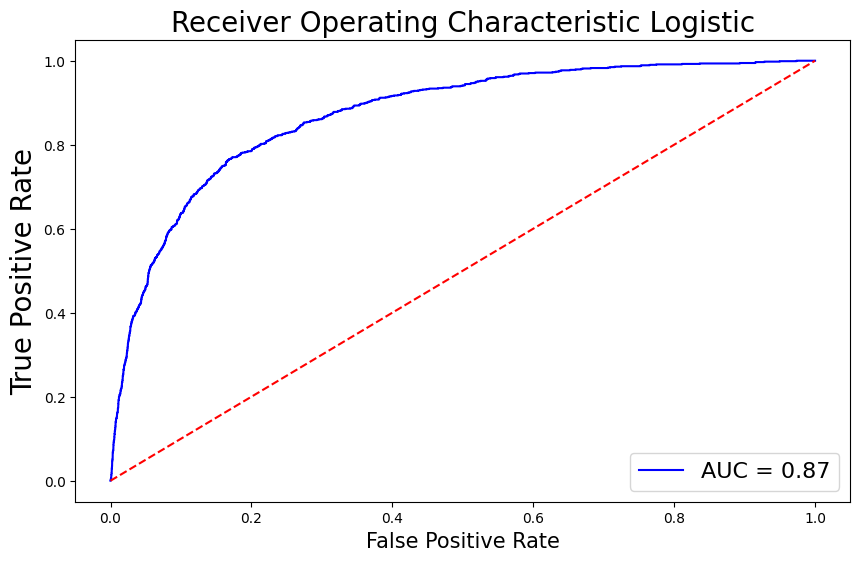

In [126]:
import math
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#Need to confirm if we can use any of these libraries for sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
#Cannot use these but for the time being and ease of calculation - is included
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

class LogisticRegression:
        
        def __init__(self, X, y, learning_rate, epsilon, max_iterations):
            self.X = X
            self.y = y
            self.learning_rate = learning_rate
            self.epsilon = epsilon
            self.max_iterations = max_iterations

        def split_data(self):
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42, stratify= y)
            # if you do not want to use any sampling, comment lines <#1,2,3,4> and appropriately return the train and test
            smote = SMOTE(random_state=42) #1
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) #2
            print("Number of samples before SMOTE:", len(X_train)) #3
            print("Number of samples after SMOTE:", len(X_train_resampled)) #4

            return X_train_resampled, X_test, y_train_resampled, y_test
   
        def add_X0(self, X):
            return np.column_stack([np.ones([X.shape[0],1]),X])

        def sigmoid(self, X):
            return 1 / (1 + np.exp(-X.dot(self.theta))) # x and theta is swapped in order cause it is over all datapoints

        def normalize_train(self, X):
            mean = np.mean(X, axis=0)
            std = np.std(X, axis=0)
            X = (X - mean) / std
            X = self.add_X0(X)
            return X, mean, std
        
        def normalize_test(self, X, mean, std):
            X = (X - mean) / std
            X = self.add_X0(X)
            return X            
        
        def cost_function(self, X, y):
            sig = self.sigmoid(X)
            pred = y * np.log(sig) + (1 - y) * np.log(1 - sig)
            cost=pred.sum()
            return -cost
        
        def cost_derivative(self, X, y):
            sig = self.sigmoid(X)
            grad = (sig - y).dot(X)
            return grad
        
        def confusion_matrix(self, X, y_true):
            y_pred = self.predict(X)
            cm = confusion_matrix(y_true, y_pred)
            return cm 

        def gradient_descent(self, X, y):
            errors=[]
            prev_error = float('inf')
            
            for i in tqdm(range(self.max_iterations)):
                self.theta = self.theta - self.learning_rate*(self.cost_derivative(X,y))
                error = self.cost_function(X,y)
                diff = prev_error - error

                errors.append(abs(error))
                
                if diff<self.epsilon:
                    print("Model stopped learning")
                    break
            self.plot_cost(errors)

        def predict(self, X):
            return np.around(self.sigmoid(X))
        
        def predict_proba(self, X):
            return self.sigmoid(X)

        def metrics_calc(self, X, y):
            y_pred = self.predict(X)

            # True Positive, False Positive, True Negative, False Negative
            TP = np.sum((y_pred == 1) & (y == 1))
            FP = np.sum((y_pred == 1) & (y == 0))
            TN = np.sum((y_pred == 0) & (y == 0))
            FN = np.sum((y_pred == 0) & (y == 1))

            # Precision, Recall, Accuracy
            precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0

            print("Precision:", round(precision*100,2), "%")
            print("Recall:", round(recall*100,2), "%")
            print("Accuracy:", round(accuracy*100,2), "%")
            print(f"F1: {round(200 * (precision * recall) / (precision + recall), 2)}%")

            cm = confusion_matrix(y, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        def plot_cost(self, cost_sequence):
            s = np.array(cost_sequence)
            t = np.arange(s.size)
        
            fig, ax = plt.subplots()
            ax.plot(t,s)
        
            ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
            ax.grid()
            plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
            plt.show()

        def run_model(self):
            X_train, X_test, y_train, y_test = self.split_data()
            X_train, mean, std = self.normalize_train(X_train)
            X_test = self.normalize_test(X_test, mean, std)

            self.theta=np.ones(X_train.shape[1], dtype=np.float64)
            self.gradient_descent(X_train, y_train)
            #predictions = self.predict(X_test)
            #cm = self.confusion_matrix(X_test, y_test)
            #print("Confusion Matrix:")
            #print(cm)
            #print(round(accuracy_score(y_test, predictions), 2) * 100)

            self.metrics_calc(X_test, y_test)            

            fig, ax_arr = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
            probs = self.predict_proba(X_test)
            preds = probs  # Since you're using predict_proba directly

            fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
            roc_auclog = metrics.auc(fprlog, tprlog)

            ax_arr.plot(fprlog, tprlog, 'b', label='AUC = %0.2f' % roc_auclog)
            ax_arr.plot([0, 1], [0, 1], 'r--')
            ax_arr.set_title('Receiver Operating Characteristic Logistic', fontsize=20)
            ax_arr.set_ylabel('True Positive Rate', fontsize=20)
            ax_arr.set_xlabel('False Positive Rate', fontsize=15)
            ax_arr.legend(loc='lower right', prop={'size': 16})

            plt.show()

X = df_dropped.drop('y', axis=1)
y = df_dropped['y']
lr = LogisticRegression(X, y, learning_rate=0.1e-4, epsilon = 0.00005, max_iterations=1000)
lr.run_model()